In [10]:
import pandas as pd

In [11]:
pos_df = pd.read_csv("./datasets/pos_english_text.csv", encoding="latin")
neg_df = pd.read_csv("./datasets/neg_english_text.csv", encoding="latin")
raw_df = pd.concat([pos_df, neg_df])
raw_df

,sentiment,text
0,4,I LOVE @Health4UandPets u guys r the best!!
1,4,im meeting up with one of my besties tonight! ...
2,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,4,Being sick can be really cheap when it hurts t...
4,4,@LovesBrooklyn2 he has that effect on everyone
...,...,...
799994,0,Sick Spending my day laying in bed listening ...
799995,0,Gmail is down?
799996,0,rest in peace Farrah! So sad
799997,0,@Eric_Urbane Sounds like a rival is flagging y...


In [12]:
lab_to_sentiment = {0: "Negative", 4: "Positive"}


def label_decoder(label):
    return lab_to_sentiment[label]


raw_df.sentiment = raw_df.sentiment.apply(lambda x: label_decoder(x))
raw_df

,sentiment,text
0,Positive,I LOVE @Health4UandPets u guys r the best!!
1,Positive,im meeting up with one of my besties tonight! ...
2,Positive,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,Positive,Being sick can be really cheap when it hurts t...
4,Positive,@LovesBrooklyn2 he has that effect on everyone
...,...,...
799994,Negative,Sick Spending my day laying in bed listening ...
799995,Negative,Gmail is down?
799996,Negative,rest in peace Farrah! So sad
799997,Negative,@Eric_Urbane Sounds like a rival is flagging y...


In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599999 entries, 0 to 799998
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  object
 1   text       1599999 non-null  object
dtypes: object(2)
memory usage: 36.6+ MB


In [14]:
raw_df.describe()

,sentiment,text
count,1599999,1599999
unique,2,1581465
top,Positive,isPlayer Has Died! Sorry
freq,800000,210


In [16]:
raw_df.drop_duplicates(inplace=True)
raw_df.describe().T

,count,unique,top,freq
sentiment,1583690,2,Positive,793506
text,1583690,1581465,@kezzawezz Yaba! Enjoy your time doon there.....,2


In [18]:
raw_df.groupby(['sentiment']).size().reset_index(name='counts')

,sentiment,counts
0,Negative,790184
1,Positive,793506


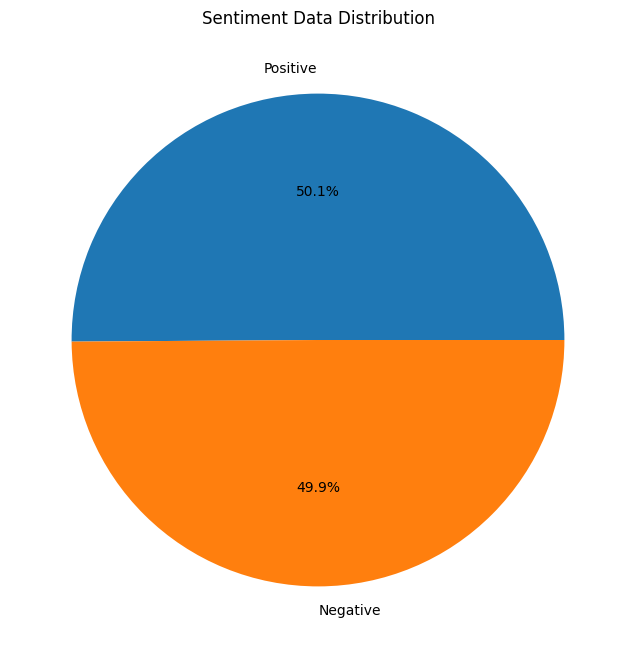

In [19]:
import matplotlib.pyplot as plt
val_count = raw_df.sentiment.value_counts()

plt.figure(figsize=(8,8),facecolor='white')
plt.pie(val_count.values, labels = val_count.index, autopct='%1.1f%%')
plt.title("Sentiment Data Distribution")
plt.show() 

In [21]:
abbreviations_df = pd.read_csv("./datasets/abbreviations.csv")
apostrophe_df = pd.read_csv("./datasets/apostrophe.csv")
emoji_df = pd.read_csv("./datasets/emoji.csv")
emoticons_df = pd.read_csv("./datasets/emoticons.csv")

In [29]:
emoticons_df.head()

,emoji,emoji_name
0,"Awkward""",:E
1,Alien,(V)o￥o(V)
2,Amazed,!(^^)!
3,Amazed,(*_*)
4,Amazed,(*_*;


In [31]:
cols = emoticons_df.columns.tolist()
cols

['emoji', 'emoji_name']

In [32]:
cols = cols[-1:] + cols[:-1]
cols

['emoji_name', 'emoji']

In [34]:
emoticons_df = emoticons_df[cols]
emoticons_df.head()

,emoji_name,emoji
0,:E,"Awkward"""
1,(V)o￥o(V),Alien
2,!(^^)!,Amazed
3,(*_*),Amazed
4,(*_*;,Amazed


In [ ]:
emoticons_df.to_csv('./datasets/emoticons.csv', index = False, encoding='utf-8', mode='w')